In [1]:
import pandas as pd

file_path = r"C:\Users\HR\Desktop\Workspace\데이터톤\마케팅\merged_data.csv"
df = pd.read_csv(file_path)

print(df.head())

                  event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00+00:00       cart     5773203  1487580005134238553   
1  2019-10-01 00:00:03+00:00       cart     5773353  1487580005134238553   
2  2019-10-01 00:00:07+00:00       cart     5881589  2151191071051219817   
3  2019-10-01 00:00:07+00:00       cart     5723490  1487580005134238553   
4  2019-10-01 00:00:15+00:00       cart     5881449  1487580013522845895   

    brand  price    user_id                          user_session  \
0  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
1  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
2  lovely  13.48  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9   
3  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
4  lovely   0.56  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9   

           event_time_moscow  event_month  \
0  2019-10-01 03:00:00+03:00         10.0   
1  2019-10-01 03:00:03+03:00         1

In [2]:
 import pandas as pd

# CSV 또는 Parquet 파일을 불러온 뒤 df에 저장했다고 가정
# 예: df = pd.read_csv('your_file.csv') 또는 pd.read_parquet('your_file.parquet')

#  1. price가 0인 행 제거
df = df[df['price'] > 0]

#  2. brand 컬럼에서 결측치 제거
df = df.dropna(subset=['brand'])

# 결과 확인 (선택사항)
print(df.shape)
print(df['price'].min())
print(df['brand'].isnull().sum())

(11932733, 11)
0.06
0


C:\Users\HR\AppData\Local\Temp\ipykernel_26708\867683892.py:24: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_purchase['event_month'] = df_purchase['event_time_moscow'].dt.to_period('M').astype(str)


✅ 일/주/월별 매출 CSV 저장 완료 (utf-8-sig 인코딩)!


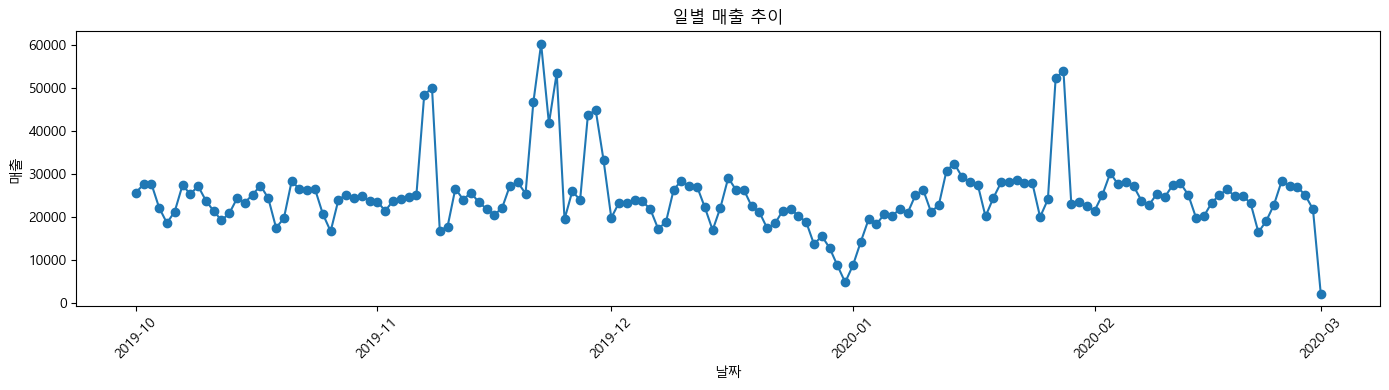

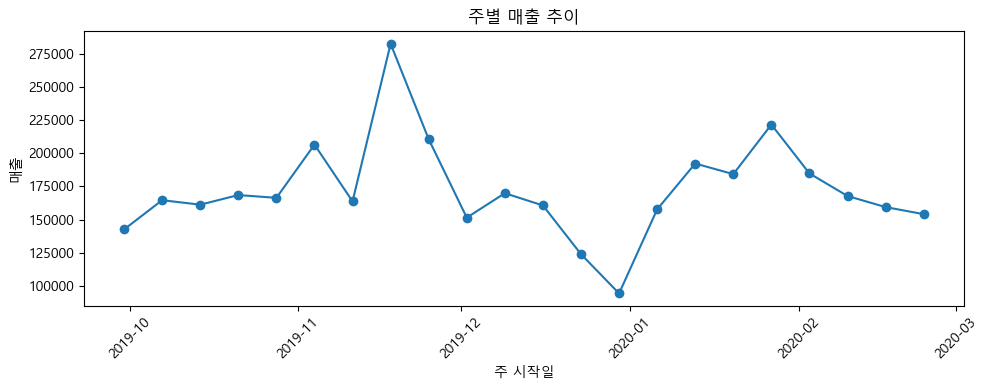

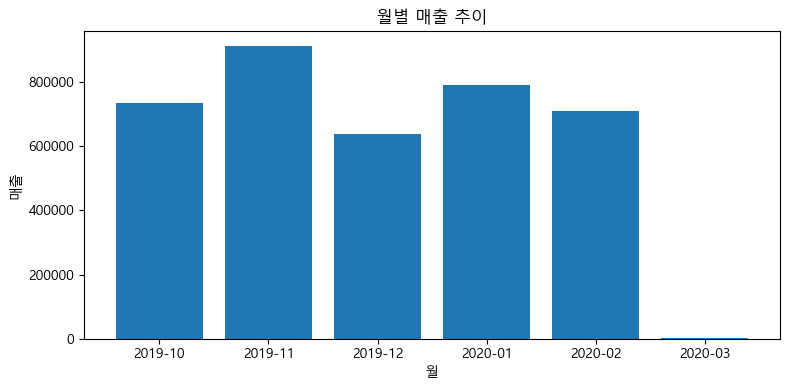

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux (예: Google Colab)
    plt.rc('font', family='NanumGothic')

# ✅ 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 1. purchase 데이터만 필터링
df_purchase = df[df['event_type'] == 'purchase'].copy()

# 2. 날짜 변환 + 타임존 제거
df_purchase['event_time_moscow'] = pd.to_datetime(df_purchase['event_time_moscow'])
df_purchase['event_date'] = df_purchase['event_time_moscow'].dt.tz_localize(None).dt.date
df_purchase['event_week'] = df_purchase['event_time_moscow'].dt.tz_localize(None).dt.to_period('W').apply(lambda r: r.start_time)
df_purchase['event_month'] = df_purchase['event_time_moscow'].dt.to_period('M').astype(str)

# 3. 일/주/월별 매출 집계
daily_sales = df_purchase.groupby('event_date')['price'].sum().reset_index().rename(columns={'price': '일별_매출'})
weekly_sales = df_purchase.groupby('event_week')['price'].sum().reset_index().rename(columns={'price': '주별_매출'})
monthly_sales = df_purchase.groupby('event_month')['price'].sum().reset_index().rename(columns={'price': '월별_매출'})

# 4. CSV 저장 (한글 안 깨지게)
daily_sales.to_csv('daily_sales.csv', index=False, encoding='utf-8-sig')
weekly_sales.to_csv('weekly_sales.csv', index=False, encoding='utf-8-sig')
monthly_sales.to_csv('monthly_sales.csv', index=False, encoding='utf-8-sig')

print("✅ 일/주/월별 매출 CSV 저장 완료 (utf-8-sig 인코딩)!")

# 5. 시각화
plt.figure(figsize=(14, 4))
plt.plot(daily_sales['event_date'], daily_sales['일별_매출'], marker='o')
plt.title('일별 매출 추이')
plt.xlabel('날짜')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(weekly_sales['event_week'], weekly_sales['주별_매출'], marker='o')
plt.title('주별 매출 추이')
plt.xlabel('주 시작일')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(monthly_sales['event_month'], monthly_sales['월별_매출'])
plt.title('월별 매출 추이')
plt.xlabel('월')
plt.ylabel('매출')
plt.tight_layout()
plt.show()


✅ 판매 중단 제품 수 CSV 저장 완료!


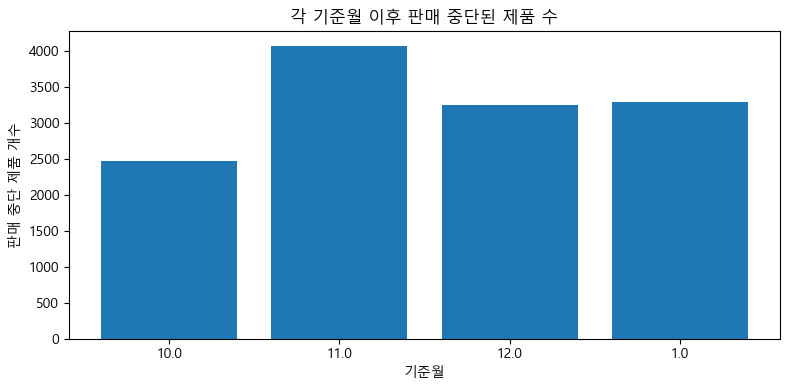

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ✅ 1. 구매 데이터 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()

# ✅ 2. 월별 product_id 리스트 생성
month_product = purchase_df.groupby('event_month')['product_id'].unique().to_dict()

# ✅ 3. 월 순서 직접 지정 (10월부터 2월까지)
month_order = [10.0, 11.0, 12.0, 1.0, 2.0]
month_product = {m: month_product[m] for m in month_order if m in month_product}
months = list(month_product.keys())

# ✅ 4. 기준월별 판매 중단 제품 수 계산
stop_data = []
for i in range(len(months) - 1):  # 마지막 달은 비교 불가
    curr_month = months[i]
    next_month = months[i + 1]

    curr_products = set(month_product[curr_month])
    next_products = set(month_product[next_month])

    stopped_products = curr_products - next_products

    stop_data.append({
        'event_month': curr_month,  # 기준월
        'stopped_product_count': len(stopped_products)
    })

# ✅ 5. DataFrame으로 정리
stop_df = pd.DataFrame(stop_data)

# ✅ 6. 월 순서 명시 & 정렬
stop_df['event_month'] = pd.Categorical(stop_df['event_month'], categories=month_order, ordered=True)
stop_df = stop_df.sort_values('event_month')

# ✅ 7. CSV 저장
stop_df.to_csv('stopped_products_per_month.csv', index=False, encoding='utf-8-sig')
print("✅ 판매 중단 제품 수 CSV 저장 완료!")

# ✅ 8. 시각화
plt.figure(figsize=(8, 4))
plt.bar(stop_df['event_month'].astype(str), stop_df['stopped_product_count'])
plt.title('각 기준월 이후 판매 중단된 제품 수')
plt.xlabel('기준월')
plt.ylabel('판매 중단 제품 개수')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# 1. 구매 데이터 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 2. 월별 브랜드별 판매 제품 목록 만들기
month_brand_product = purchase_df.groupby(['event_month', 'brand'])['product_id'].unique()

# 3. 월 순서 지정
month_order = [10.0, 11.0, 12.0, 1.0, 2.0]
stop_data = []

# 4. 기준월별 브랜드별 판매 중단 제품 계산
for i in range(len(month_order) - 1):  # 마지막 달은 비교 불가
    curr_month = month_order[i]
    next_month = month_order[i + 1]

    curr_data = month_brand_product[curr_month] if curr_month in month_brand_product.index.levels[0] else pd.Series()
    next_data = month_brand_product[next_month] if next_month in month_brand_product.index.levels[0] else pd.Series()

    curr_brands = curr_data.index.get_level_values('brand').unique()

    for brand in curr_brands:
        curr_products = set(curr_data.get(brand, []))
        next_products = set(next_data.get(brand, []))

        stopped_products = curr_products - next_products

        stop_data.append({
            'event_month': curr_month,
            'brand': brand,
            'stopped_product_count': len(stopped_products)
        })

# 5. DataFrame 변환 및 정렬
brand_stop_df = pd.DataFrame(stop_data)
brand_stop_df['event_month'] = pd.Categorical(brand_stop_df['event_month'], categories=month_order, ordered=True)
brand_stop_df = brand_stop_df.sort_values(['event_month', 'stopped_product_count'], ascending=[True, False])

# 6. 저장
brand_stop_df.to_csv('brand_stopped_products_per_month.csv', index=False, encoding='utf-8-sig')
print("✅ 브랜드별 판매 중단 제품 수 CSV 저장 완료!")

# 7. 미리보기 (각 월 상위 5개 브랜드 출력)
print("📉 월별 브랜드 판매 중단 제품 수 미리보기:")
print(brand_stop_df.groupby('event_month').head(5))


✅ 브랜드별 판매 중단 제품 수 CSV 저장 완료!
📉 월별 브랜드 판매 중단 제품 수 미리보기:
    event_month      brand  stopped_product_count
160        10.0       pole                    173
132        10.0     masura                    133
20         10.0    bluesky                    108
200        10.0     uskusi                    107
28         10.0        cnd                    101
413        11.0     uskusi                    237
333        11.0    lianail                    180
344        11.0     masura                    179
281        11.0  freedecor                    174
363        11.0       oniq                    155
595        12.0       pole                    209
563        12.0     masura                    141
492        12.0      estel                    135
520        12.0      irisk                    129
635        12.0     uskusi                    117
791         1.0     masura                    250
679         1.0        cnd                    137
726         1.0  freedecor                   

C:\Users\HR\AppData\Local\Temp\ipykernel_26708\935691334.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(brand_stop_df.groupby('event_month').head(5))


✅ 브랜드 월별 매출 CSV 저장 완료!


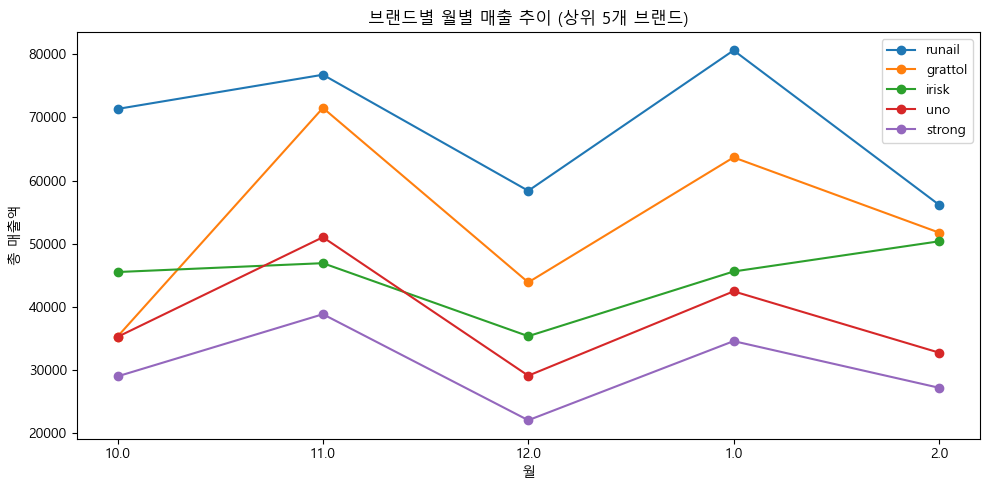

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ✅ 1. 구매 데이터 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()

# ✅ 2. 브랜드 기반 월별 총 매출 집계
brand_month_sales = purchase_df.groupby(['event_month', 'brand'])['price'].sum().reset_index()
brand_month_sales.rename(columns={'price': 'total_sales'}, inplace=True)

# ✅ 3. 월 순서 지정 (10월~2월)
month_order = [10.0, 11.0, 12.0, 1.0, 2.0]
brand_month_sales['event_month'] = pd.Categorical(brand_month_sales['event_month'],
                                                  categories=month_order,
                                                  ordered=True)
brand_month_sales = brand_month_sales.sort_values(['event_month', 'total_sales'], ascending=[True, False])

# ✅ 4. CSV 저장
brand_month_sales.to_csv('brand_monthly_sales.csv', index=False, encoding='utf-8-sig')
print("✅ 브랜드 월별 매출 CSV 저장 완료!")

# ✅ 5. 시각화: 브랜드별 매출 변화 추이 (상위 5개 브랜드 기준 예시)
top_brands = brand_month_sales.groupby('brand')['total_sales'].sum().sort_values(ascending=False).head(5).index
plot_df = brand_month_sales[brand_month_sales['brand'].isin(top_brands)]

plt.figure(figsize=(10, 5))
for brand in top_brands:
    data = plot_df[plot_df['brand'] == brand]
    plt.plot(data['event_month'].astype(str), data['total_sales'], marker='o', label=brand)

plt.title('브랜드별 월별 매출 추이 (상위 5개 브랜드)')
plt.xlabel('월')
plt.ylabel('총 매출액')
plt.legend()
plt.tight_layout()
plt.show()


✅ 요일별 매출 CSV 저장 완료!


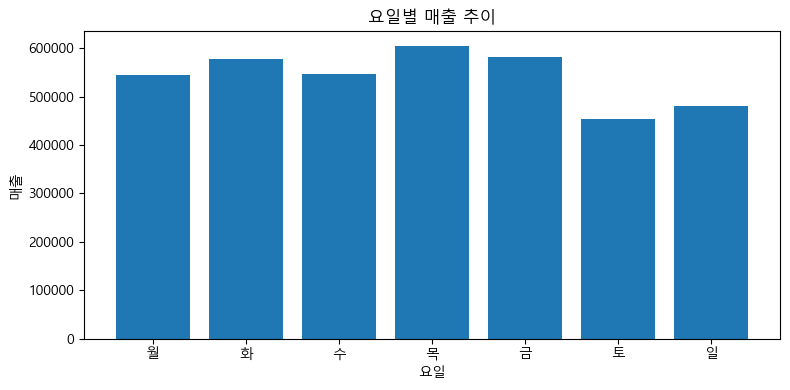

In [7]:
# 1. 요일 정보 추가 (0=월, 6=일 → 한글로 변환)
df_purchase['event_dayofweek'] = pd.to_datetime(df_purchase['event_time_moscow']).dt.dayofweek
day_labels = ['월', '화', '수', '목', '금', '토', '일']
df_purchase['요일'] = df_purchase['event_dayofweek'].apply(lambda x: day_labels[x])

# 2. 요일별 매출 집계
weekday_sales = df_purchase.groupby('요일')['price'].sum().reindex(day_labels).reset_index()
weekday_sales.rename(columns={'price': '요일별_매출'}, inplace=True)

# 3. CSV 저장
weekday_sales.to_csv('weekday_sales.csv', index=False, encoding='utf-8-sig')
print("✅ 요일별 매출 CSV 저장 완료!")

# 4. 시각화
plt.figure(figsize=(8, 4))
plt.bar(weekday_sales['요일'], weekday_sales['요일별_매출'])
plt.title('요일별 매출 추이')
plt.xlabel('요일')
plt.ylabel('매출')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 요일 라벨
day_labels = ['월', '화', '수', '목', '금', '토', '일']

# ✅ 요일 정보 추가
df_purchase['event_dayofweek'] = pd.to_datetime(df_purchase['event_time_moscow']).dt.dayofweek
df_purchase['요일'] = df_purchase['event_dayofweek'].apply(lambda x: day_labels[x])

# ✅ 월-요일별 매출 집계
month_weekday_sales = df_purchase.groupby(['event_month', '요일'])['price'].sum().reset_index()
month_weekday_sales.rename(columns={'price': '매출'}, inplace=True)

# ✅ 요일 정렬 순서 지정
month_weekday_sales['요일'] = pd.Categorical(month_weekday_sales['요일'], categories=day_labels, ordered=True)
month_weekday_sales = month_weekday_sales.sort_values(['event_month', '요일'])

# ✅ CSV 저장
month_weekday_sales.to_csv('month_weekday_sales.csv', index=False, encoding='utf-8-sig')
print("✅ 월별 요일별 매출 CSV 저장 완료!")

# ✅ 피벗 테이블로 구조 확인 (월-행, 요일-열)
pivot_table = month_weekday_sales.pivot(index='event_month', columns='요일', values='매출')
print("\n📊 월별 요일별 매출 피벗 테이블:")
print(pivot_table)


✅ 월별 요일별 매출 CSV 저장 완료!

📊 월별 요일별 매출 피벗 테이블:
요일                   월          화          수          목          금          토  \
event_month                                                                     
2019-10      104954.12  124869.35  130742.15  128623.65   88281.98   71633.62   
2019-11       97268.10  102537.92   99801.33  161861.02  200359.57  133377.55   
2019-12      108610.61  104257.94   97298.51   91680.34   78491.11   66809.53   
2020-01      131138.05  136086.31  110185.71  118533.79  123388.30   79306.25   
2020-02      102509.32  109539.64  107731.24  103912.03   91615.68  102377.00   
2020-03            NaN        NaN        NaN        NaN        NaN        NaN   

요일                   일  
event_month             
2019-10       85433.89  
2019-11      116841.68  
2019-12       91626.79  
2020-01       91461.55  
2020-02       92589.03  
2020-03        2089.03  


C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

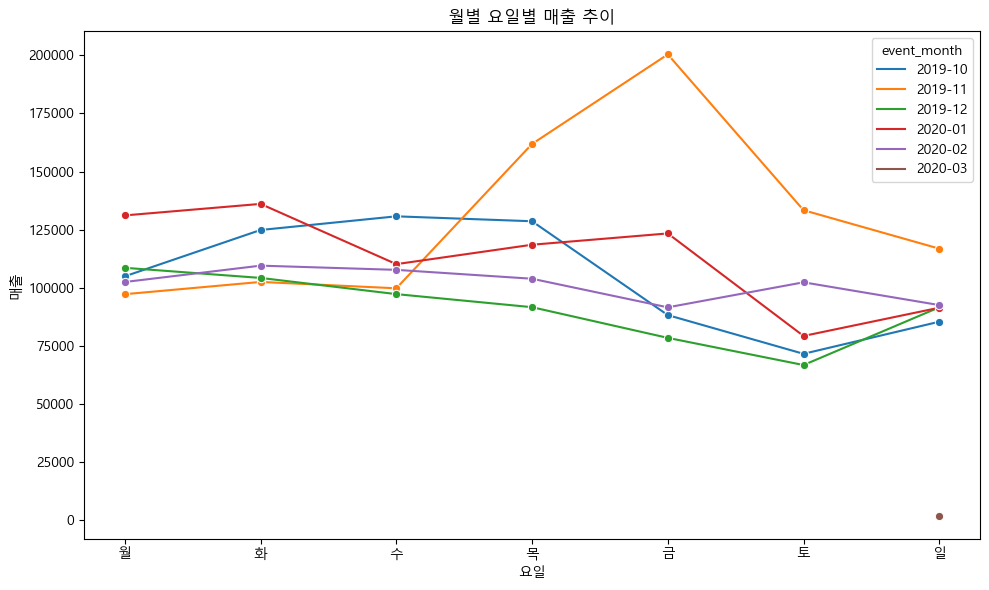

In [9]:
# ✅ 월별 요일별 꺾은선 그래프
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_weekday_sales, x='요일', y='매출', hue='event_month', marker='o')
plt.title('월별 요일별 매출 추이')
plt.ylabel('매출')
plt.xlabel('요일')
plt.tight_layout()
plt.show()
